In [5]:
df = pd.read_csv("/content/parking_time_series.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)

In [6]:
df = pd.read_csv("/content/parking_time_series.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df = df.sort_values("timestamp")

In [7]:
time_diff = df['timestamp'].diff().value_counts()
print(time_diff.head())

timestamp
0 days 01:00:00    4344
Name: count, dtype: int64


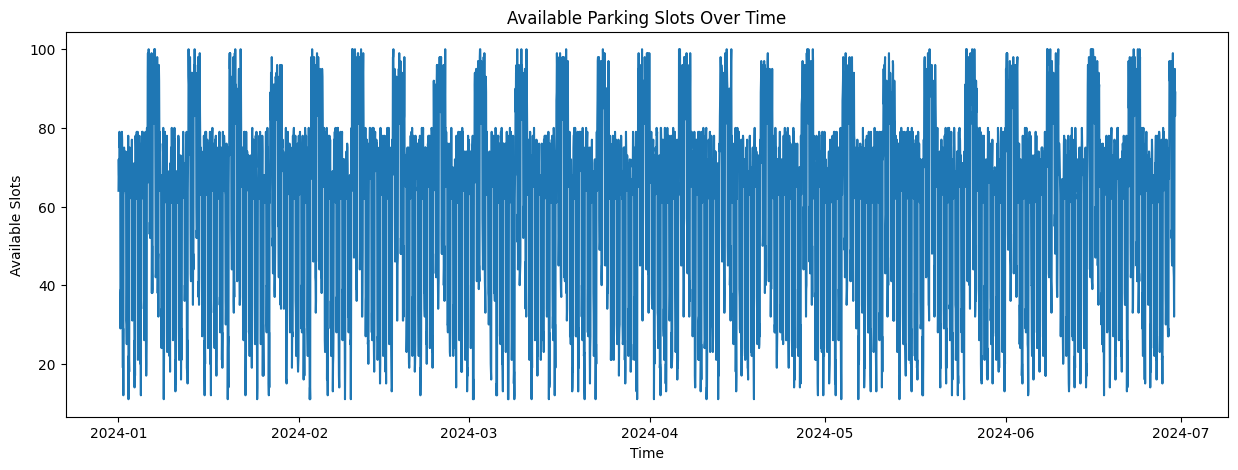

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df['timestamp'], df['available_slots'])
plt.title("Available Parking Slots Over Time")
plt.xlabel("Time")
plt.ylabel("Available Slots")
plt.show()

In [9]:
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

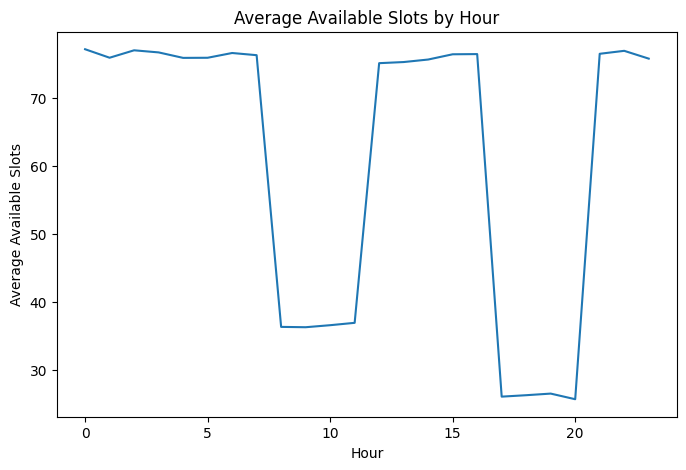

In [10]:
hourly_avg = df.groupby('hour')['available_slots'].mean()

plt.figure(figsize=(8,5))
plt.plot(hourly_avg.index, hourly_avg.values)
plt.title("Average Available Slots by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Available Slots")
plt.show()

In [11]:
df_corr = df[['occupied_slots','available_slots','hour','weekday']]
print(df_corr.corr())

                 occupied_slots  available_slots      hour   weekday
occupied_slots         1.000000        -1.000000  0.277308 -0.291394
available_slots       -1.000000         1.000000 -0.277308  0.291394
hour                   0.277308        -0.277308  1.000000 -0.000578
weekday               -0.291394         0.291394 -0.000578  1.000000


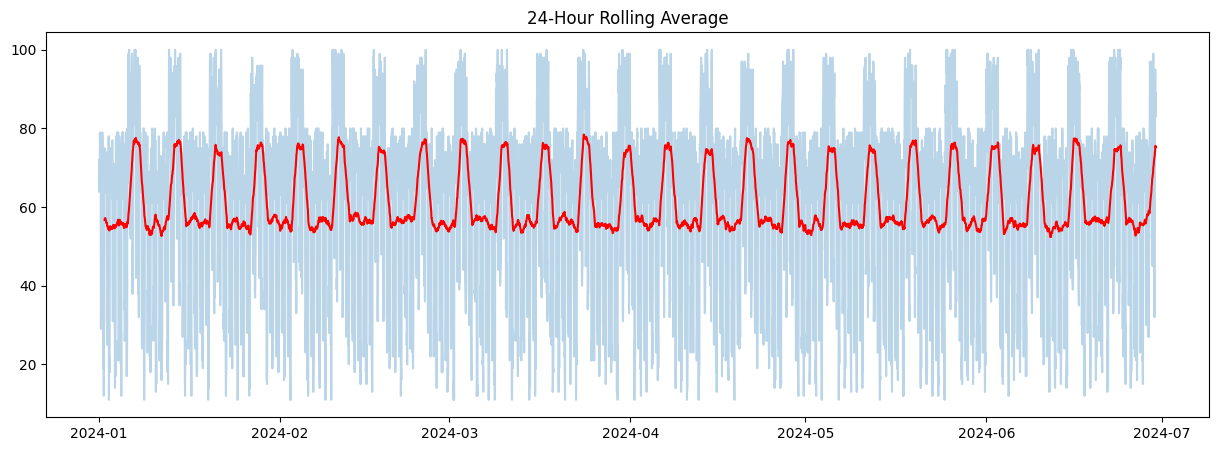

In [12]:
df['rolling_24h'] = df['available_slots'].rolling(24).mean()

plt.figure(figsize=(15,5))
plt.plot(df['timestamp'], df['available_slots'], alpha=0.3)
plt.plot(df['timestamp'], df['rolling_24h'], color='red')
plt.title("24-Hour Rolling Average")
plt.show()

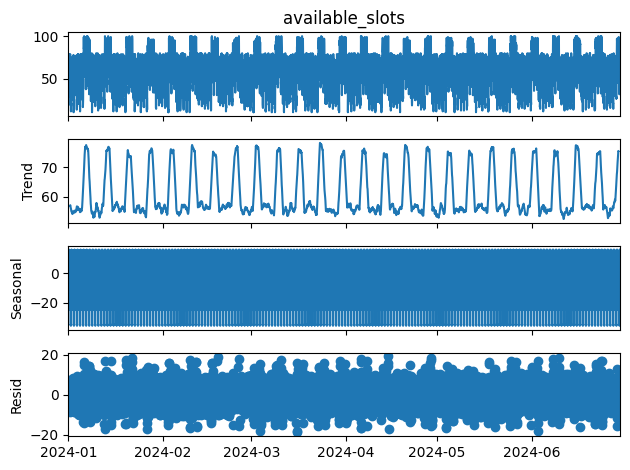

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('timestamp', inplace=True)

result = seasonal_decompose(df['available_slots'], model='additive', period=24)

result.plot()
plt.show()